# Second Assignment
## Image Processing
### 4th CSE 2020

| Name  | ID    | Email   |                                     
| -------| ---------| ----------|
|  ريهام عصام الدين عبدالكريم التاجوري   |   1500607    | rehameltagoury@gmail.com         |
| مريم خالد محمد كامل علوي  |   1501406    | mariamelwy@yahoo.com         |

# 1 Dilation
#### ( 1 mark)
Dilation is one of the basic operators in the area of morphology. The basic effect of the operator on a binary image is to gradually expand the region boundary of the foreground Pixels.



In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import imutils
%matplotlib inline

1. In this problem, read the ‘square-circle.png’. Use the dilation operation on this image with two different structuring elements (square and circle). This size of structuring element is of your choice. Plot results with title square-circle-1 and square-circle-2. Compare and contrast your results. Explain your Observations. (0.5 mark)

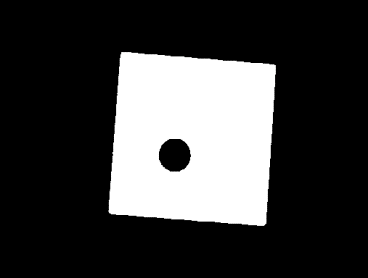


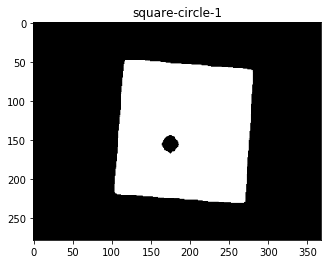

In [35]:
# TODO: use first structuring element
img = cv2.imread('image2_folder/square-circle.png')
kernel = np.ones((10,10),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.title('square-circle-1')
plt.imshow(dilation)

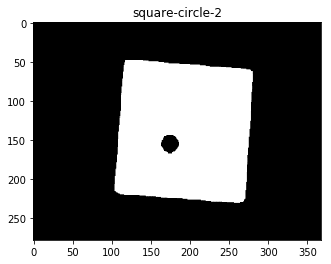

In [36]:
# TODO: use second structuring element
kernel2=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10,10))
dilation2 = cv2.dilate(img,kernel2,iterations = 1)
plt.title('square-circle-2')
plt.imshow(dilation2)

*Observation:* 
##### write your observation here.

The circle structural element perserves the circular shape of the circle more than the square one, but the edges of the square is rounder due to the circular shape of the structuring element. Dialation increased the number of white pixels in the image as observed from the diminishing size of the black circle.



2- Edge detection can be accomplished using dilation in conjunction with other operations. There are different methods. Describe how you perform edge detection using dilation. Use the lady.png for this operation. Plot your result with title lady-edge. (0.5 mark)

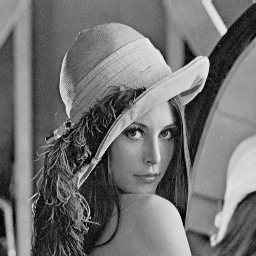


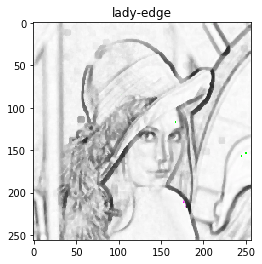

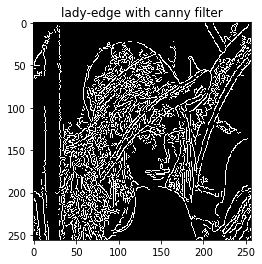

In [37]:
#TODO : use suitable morphological operations to apply edge detection.
'''
gray=cv2.imread('image2_folder/lady.png')
edges = cv2.Canny(gray, 5, 200)
kernel = np.ones((1,1),np.uint8)
dilation = cv2.dilate(edges,kernel,iterations = 1)
plt.title('lady-edge')
plt.imshow(dilation,cmap='gray')
plt.show()
dilated = cv2.dilate(gray,kernel,iterations = 1)
new_edges = gray-dilated
new_edges=cv2.medianBlur(new_edges,3)
plt.title('lady-edge')
plt.imshow(new_edges,cmap='gray')
plt.show()
'''

gray=cv2.imread('image2_folder/lady.png')
edges = cv2.Canny(gray, 5, 200)
kernel = np.ones((8,8),np.uint8)
cannykernel= np.ones((1,1),np.uint8)
dilation = cv2.dilate(gray,kernel,iterations = 1)
canny_edges=cv2.dilate(edges,cannykernel,iterations = 1)
new_edges = gray-dilation
new_edges=cv2.medianBlur(new_edges,3)
plt.title('lady-edge')
plt.imshow(new_edges)
plt.show()
plt.title('lady-edge with canny filter')
plt.imshow(canny_edges,cmap='gray')
plt.show()
#plt.imshow(new_edges)


*Description:*
Edge detection can be accomplished using two ways:
 ● Dilation 
 ● Canny Filter

   ❶ DILATION:
     It is a Morphological Operation in which it gradually expand the region boundary of the foreground Pixels. 
      ##STEPS:
        1- Creating the kernel with size 8x8
        2- Dilate the image using cv2.dilate
        3- Subtracting the dilated image from the original image 
        4- Apply the median filter to remove salt and pepper noise
  
   ❷ Canny Filter:
     The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in      images.
      # The Process of Canny Filter:
            1- Apply Gaussian filter to smooth the image in order to remove the noise
            2- Find the intensity gradients of the image
            3- Apply non-maximum suppression to get rid of spurious response to edge detection
            4- Apply double threshold to determine potential edges
            5- Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak 
              and not connected to strong edges.
      ##STEPS we used:
        1- Apply the canny filter function on the lady image
        2- Apply dilation with kernel size 1x1

# 2 Erosion
#### ( 1 mark)

The basic effect of the erosion operator on a binary image is to erode away the boundaries of regions of foreground pixels. Thus the areas of the foreground pixel shrink in size and holes within those areas become larger.


3- Apply the erosion technique to ‘circle-square.png’. Use two different structuring elements (circle and square). Plot the image with title circle-square-erode . Compare and contrast your results. Explain your observation. (0.5 mark)

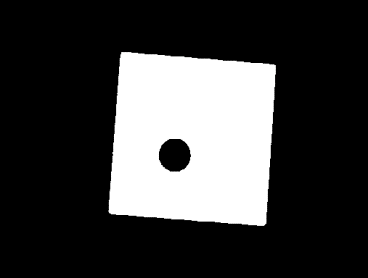

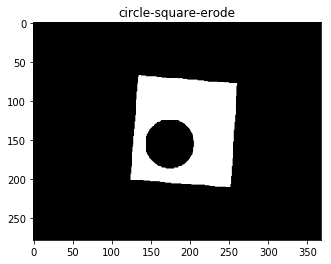

In [38]:
# TODO: use first structuring element
kernel4=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (30,30))
erosion = cv2.erode(img,kernel4,iterations = 1)
plt.title('circle-square-erode')
plt.imshow(erosion)

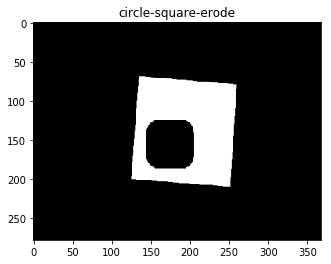

In [39]:
# TODO: use second structuring element
img = cv2.imread('image2_folder/square-circle.png')
kernel2 = np.ones((30,30),np.uint8)
erosion2 = cv2.erode(img,kernel2,iterations = 1)
plt.title('circle-square-erode')
plt.imshow(erosion2)

*observation:*

The circle structural element perserves the circular shape of the circle more than the square one due to the circular shape of the structuring element. Erosion increased the number of black pixels in the image as observed from the bigger size of the black circle.


4- The image shows a number of dark disks against a light background. Do a thresholding of this image and then use the erosion operation to display the circles distinctly in the image. Plot your image with title circle-erode. (0.5 mark)

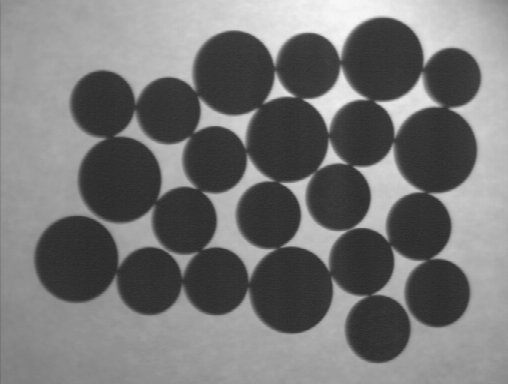

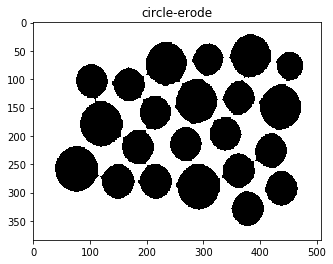

In [53]:
# Write your code here 
circle=cv2.imread('image2_folder/Circle.png')
#circle=mpimg.imread('image2_folder/Circle.png')
#plt.hist(circle.ravel(),256, [0, 256])
#plt.show()
ret, thresh1 = cv2.threshold(circle, 70, 255, cv2.THRESH_BINARY)
#plt.imshow(thresh1) 
kernel2 = np.ones((5,5),np.uint8)
kernel3=cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1,1))
disks = cv2.erode(thresh1,kernel3,iterations =1)
#disks = cv2.dilate(disks,kernel3,iterations =1)
#disks = cv2.dilate(disks,kernel3,iterations =1)
disks = cv2.dilate(disks,kernel2,iterations =1)
plt.title('circle-erode')
plt.imshow(disks)




















































# 3 Opening and Closing
### ( 3 marks)

These are operations that are derived from the fundamental operations of erosion and dilation. The basic effect of an opening is like erosion in that it tends to remove some of the foreground (bright) pixels from the edges of regions of foreground pixels. The exact operation is determined by the structural element only. Closing is similar in some ways to dilation, in that it tends to enlarge the boundaries of the foreground regions in an image


5- In this section you will be separating out various objects from the images using the opening function. For the given image Circle_and_Lines.png, use the opening technique with the appropriate structuring element. ( 2 marks)

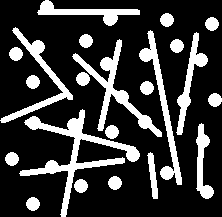

(a) Your mission is to separate the circles from the lines. Plot your image as circle and line. The circle_png image should contain only circles, and the line.png image should contain only lines. Explain the structural element you have used. If you have experimented with other structural elements, describe your results and observations. What are the drawbacks or limitations of this method? Compare and contrast with the previous methods you have implemented. Apply opening to the same image with the same structural element of different sizes. How the sizes of the structuring elements affect the results. ( 1 mark)


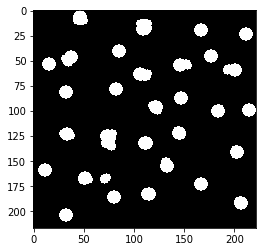

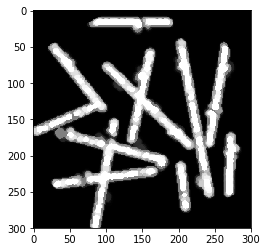

In [41]:
## TODO: Seperate circles and lines
##Circles part
img = mpimg.imread('image2_folder/Circle_and_Lines.png')
kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11)) #circle structuring element
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
cv2.imwrite('image2_folder/circle_png.png', opening)
plt.imsave("image2_folder/circle_png",opening)

##Lines part

image = mpimg.imread('image2_folder/Circle_and_Lines.png')
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(9,9))
rec_kernel = np.ones((9,9),np.uint8) #Opening with the kernels
eroded_image = cv2.erode(image,kernel,iterations = 1)
dilated_image = cv2.dilate(eroded_image,kernel,iterations = 1)
eroded_image_rec = cv2.erode(image,rec_kernel,iterations = 1)
dilated_image_rec = cv2.dilate(eroded_image_rec,rec_kernel,iterations = 1)

plt.imshow(dilated_image)
plt.figure()

st_lines=image-dilated_image
filtered = cv2.medianBlur(st_lines,3)
diagonal=np.zeros((5,5),np.uint8)
diagonal[(1,0)]=1
diagonal[(1,1)]=1
diagonal[(1,2)]=1
diagonal[(3,3)]=1
diagonal[(4,4)]=1
filtered = cv2.resize(filtered, (300,300))
image = cv2.resize(image, (300,300))
for i in np.arange(0, 360, 60):
    image= imutils.rotate(image, i)
    filtered = imutils.rotate(filtered, i)
    filtered = cv2.dilate(filtered,diagonal,iterations = 1)
    filtered= cv2.bitwise_and(filtered,image)  
filtered = imutils.rotate(filtered, 180)
filtered = cv2.medianBlur(filtered,3)
kernel_d = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
filtered = cv2.dilate(filtered,kernel_d,iterations = 1)
filtered = cv2.medianBlur(filtered,3)
filtered = cv2.medianBlur(filtered,3)
#filtered = cv2.medianBlur(filtered,5)
plt.imshow(filtered)
plt.imsave('image2_folder/line', filtered)

*Description:*
##### Answer the questions here.

 ● Circle Separation :
   By using Opening morphology (erosion then dilation) and a structuring element of an elipse shape with size 11x11 we extracted    the circles from the image. 
  
    ▪ Using a cricle structuring element instead of a square shape to keep the circles more round.
 
 ● Line Separation :
   
   ▪ Our Trials:
     
     ❶ subtracting the extracted circle from the original image then apply a closing process with elipse structuring element of size 11x11 to remove the noise (some circle shapes left) 
       *Results:
         we got broken lines which is not accurate we tried to dilate it to fill in but it didn't work properly.
      
     ❷ 
        1- Subtracting the extracted circle from the original. 
        2- Rotating it with step angle then dilate every rotating step with a horizontal kernel.
        3- Applying a bit-wise "and" operation with the original image to get the intersection of both images.
        4- Dilate the image using "elipse structuring element" "other sizes are also used" to get a better one. 
        5- Applying Filter to make the lines more smooth.
 
   

(b) Develop an algorithm; using the appropriate morphological filters, to count how many circles and how many lines are there in Circle_and_lines.png (via circles.png. and lines.png), “Label each item in the picture with a distinct integer”. Discuss your algorithm briefly, and document your code and your results in the report. ( 1 mark)

##### Hint:

use connected components to count the objects. 

To label: cv2.putText, parameters Text and Center point (from connected components ) 



number of circles are :32


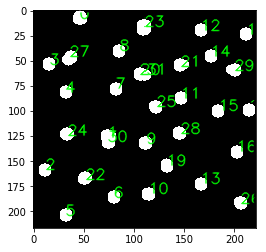

number of lines are :12


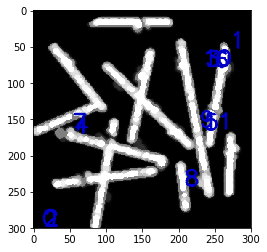

In [43]:
# Write your code here
# Write your code here
"""code for detecting number of circles"""
circle = cv2.imread('image2_folder/circle_png.png')
gray_img = cv2.cvtColor(circle, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, 5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,5, param1=120,param2=8,minRadius=0,maxRadius=25)

circles = np.uint16(np.around(circles))
count = 0
for i in circles[0,:]:
   #cv2.circle(circle,(i[0],i[1]),i[2],(0,0,255),2)
   # draw the center of the circle
   #cv2.circle(circle,(i[0],i[1]),2,(0,0,255),3)
   cv2.putText(circle,str(count),(i[0],i[1]),cv2.FONT_HERSHEY_SIMPLEX ,0.5,(0, 255, 0) ,1,cv2.LINE_AA )
   count+=1
print("number of circles are :" + str(count))
#plt.subplot(221),plt.imshow(circle)
plt.imshow(circle)
plt.show()
"""code for detecting number of lines"""
image =cv2.imread('image2_folder/line.png')
kernel = np.ones((5,5), np.uint8) 
img_erosion = cv2.erode(image, kernel, iterations=2) 
#plt.imshow(img_erosion)
#plt.show()
gray = cv2.cvtColor(img_erosion, cv2.COLOR_BGR2GRAY)
blur_gray=cv2.GaussianBlur(gray,(5, 5),1)
edges = cv2.Canny(gray, 75, 150)


lines = cv2.HoughLinesP(edges, 1, np.pi/180,59, maxLineGap=250)
#print(str(len(lines)))
count_line=0
for line in lines:
   #count_line+=1
    #print(line)
    x1, y1, x2, y2 = line[0]
   #print(line[0])
    distance=np.sqrt(np.power(x2-x1,2)+np.power(y2-y1,2))
    
    #print(distance)
    if distance >=223:
        cv2.putText(image,str(count_line),(y2,y1),cv2.FONT_HERSHEY_SIMPLEX ,1,(0, 0, 200) ,2,cv2.LINE_AA )
        count_line+=1
    else:
        continue
#plt.subplot(222),

plt.imshow(image)
print("number of lines are :" + str(count_line))


*Description:*
 
 ● Circle Detection :
  Using HoughCircles function to detect the circles and increment the counter by 1
     # Hough Circle:
     The circle Hough Transform (CHT) is a basic feature extraction technique used in digital image processing for detecting          circles in imperfect images. The circle candidates are produced by “voting” in the Hough parameter space and then selecting      local maxima in an accumulator matrix.
     
     ##steps:
       1- Converting the image to gray scale
       2- Apply median filter with size 5
       3- Apply HoughCircles function to detect the circles
       4- store the circles in a numpy array
       5- loop the circle array and increment the counter 
     **please note that this function must take an 8-bit image 
 
 
 ● Line Detection :
   Using HoughLinesP funtion to detect the lines and increment the counter by 1
      # Hough Lines:
      The Hough Transform is a method that is used in image processing to detect any shape, if that shape can be represented in       mathematical form. It can detect the shape even if it is broken or distorted a little bit.
      
      ##steps:
      We discovered that the canny filter convert the dilated lines into a couple of lines so we erode it first and applied           Guassian blur to smoothen the lines
      1-To apply the Houghline method, first an edge detection of the specific image is desirable. We used Canny Filter
      2-Apply the HoughLinesP function
      3- loop on the result to detect the lines and count it
      4- Calculate the distance of the line in order to avoid short line (broken line)
      5- if the distance is stuible we will consider it as long line and increment the counter


6- Design an image processing pipeline for calculating the money and highlighting
the coins available in the following image.
Given that the large coin is 50, and the small one is 25. ( 1 mark)

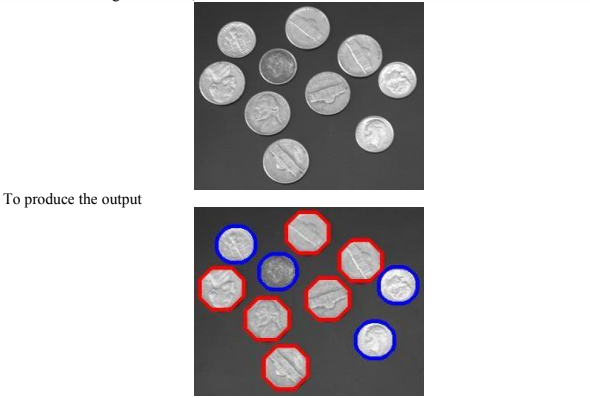

Number of coins are:10
Amount of money:400


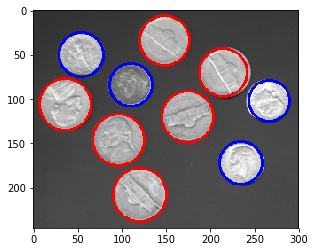

In [44]:
## Write your code here
## Write your code here

coins = cv2.imread('image2_folder/coins.png')
gray_img = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, 5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,7,

                           param1=150,param2=35,minRadius=0,maxRadius=50)

circles = np.uint16(np.around(circles))
count = 0
count_amt=0
for i in circles[0,:]:
   # draw the outer circle
   count+=1
   #print(circles[0,:])
   if i[2]<=25:
     cv2.circle(coins,(i[0],i[1]),i[2],(0,0,255),2)
     count_amt+=25
   else:
     cv2.circle(coins,(i[0],i[1]),i[2],(255,0,0),2)
     count_amt+=50

print("Number of coins are:"+str(count))
print("Amount of money:"+str(count_amt))
plt.imshow(coins)


How could you generalize it to work with this?

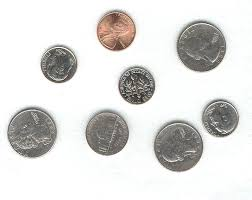

Number of coins are:8
Amount of money:275


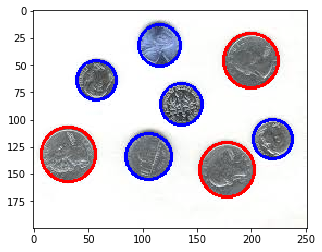

In [45]:
## Write your code here
"""we generalize the function by making it select the min dist according to the rows of the picture"""
coins = cv2.imread('image2_folder/coins_color.jpeg')
gray_img = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, 5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
rows,col=gray_img.shape
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,rows/16,

                           param1=150,param2=35,minRadius=0,maxRadius=50)

circles = np.uint16(np.around(circles))
count = 0
count_amt=0
for i in circles[0,:]:
   # draw the outer circle
   count+=1 
   #print(i)
   if i[2]<25:
     cv2.circle(coins,(i[0],i[1]),i[2],(0,0,255),2) #blue coins
     count_amt+=25
   else:
     cv2.circle(coins,(i[0],i[1]),i[2],(255,0,0),2) #red coins
     count_amt+=50
print("Number of coins are:"+str(count))
print("Amount of money:"+str(count_amt))
plt.imshow(coins)

# Bonus
### ( 1 bonus mark)
7- Propose a pipeline to replace the morning background of the left image with the
night background of the right image.

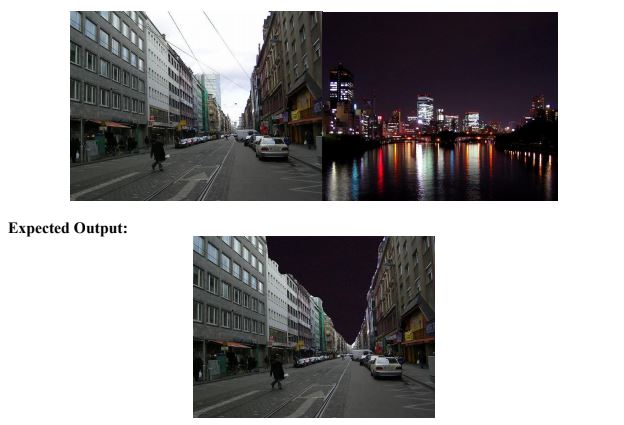


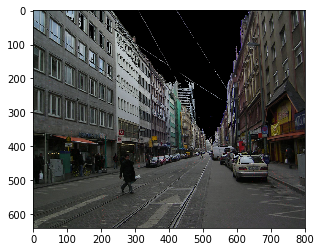

In [46]:
## Write your code here
morning = cv2.imread("image2_folder/morning.jpg")
night=cv2.imread("image2_folder/evening.jpg")
##morning part
rgbmorning = cv2.cvtColor(morning, cv2.COLOR_BGR2RGB)
gmorning = cv2.cvtColor(rgbmorning, cv2.COLOR_BGR2GRAY)
ret,mask_m = cv2.threshold(gmorning,200,255,cv2.THRESH_BINARY)
masked_morning = np.copy(morning)
masked_morning[mask_m != 0] = [0, 0, 0]
##night part
rgbnight = cv2.cvtColor(night, cv2.COLOR_BGR2RGB)
gnight = cv2.cvtColor(rgbnight, cv2.COLOR_BGR2GRAY)
ret,mask_n = cv2.threshold(gnight,5,255,cv2.THRESH_BINARY)
masked_night = np.copy(night)
masked_night[mask_n != 0] = [0, 0, 0]
m=cv2.resize(masked_morning,(800,640))
n=cv2.resize(masked_night,(800,640))
res=cv2.add(m,n)
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
plt.imshow(res)

### ( 1 bonus mark)
8- You need to detect Thumbs up! First detect contours from thumbs_up_down.jpg

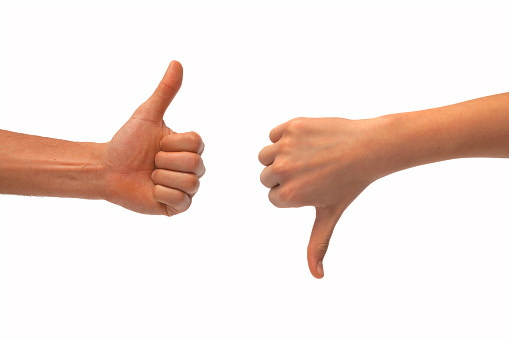


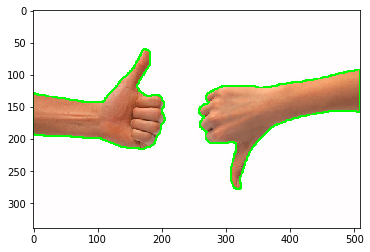

In [47]:
# TODO detect contors for the hands
image = cv2.imread("image2_folder/thumbs_up_down.jpg")

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
res, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
#plt.imshow(binary, cmap="gray")
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

selected_contour = contours[1]

plt.imshow(image)


## Contour Features
Every contour has a number of features that you can calculate, including the area of the contour, it's orientation (the direction that most of the contour is pointing in), it's perimeter, and many other properties outlined in OpenCV documentation, here. https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_contours/py_contour_properties/py_contour_properties.html

In the next cell, you'll be asked to identify the orientations of both the left and right hand contours. The orientation should give you an idea of which hand has its thumb up and which one has its thumb down!

Orientation
The orientation of an object is the angle at which an object is directed. To find the angle of a contour, you should first find an ellipse that fits the contour and then extract the angle from that shape.

*Fit an ellipse to a contour and extract the angle from that ellipse*

#### (x,y), (MA,ma), angle = cv2.fitEllipse(selected_contour)

##### Orientation values

These orientation values are in degrees measured from the x-axis. A value of zero means a flat line, and a value of 90 means that a contour is pointing straight up!

So, the orientation angles that you calculated for each contour should be able to tell us something about the general position of the hand. The hand with it's thumb up, should have a higher (closer to 90 degrees) orientation than the hand with it's thumb down.

### TODO: Find the orientation of each contour

In [48]:
## TODO: Complete this function so that 
## it returns the orientations of a list of contours
## The list should be in the same order as the contours
## i.e. the first angle should be the orientation of the first contour
def orientations(contours):
    """
    Orientation 
    :param contours: a list of contours
    :return: angles, the orientations of the contours
    """
    #print(contours)
    # Create an empty list to store the angles in
    # Tip: Use angles.append(value) to add values to this list
    angles = []
    for i in contours:
         #print(i)
         (x,y), (MA,ma), angle = cv2.fitEllipse(i)
         angles.append(angle)
    #print(angles)
    
    return angles


# ---------------------------------------------------------- #
# Print out the orientation values
angles = orientations(contours)
print('Angles of each contour (in degrees): ' + str(angles))

Angles of each contour (in degrees): [61.35833740234375, 82.27550506591797]


## Bounding Rectangle
In the next cell, you'll be asked to find the bounding rectangle around the left hand contour, which has its thumb up, then use that bounding rectangle to crop the image and better focus on that one hand!

*Find the bounding rectangle of a selected contour*
### x,y,w,h = cv2.boundingRect(selected_contour)

*Draw the bounding rectangle as a purple box*
#### box_image = cv2.rectangle(contours_image, (x,y), (x+w,y+h), (200,0,200),2)
And to crop the image, select the correct width and height of the image to include.

*Crop using the dimensions of the bounding rectangle (x, y, w, h)
#### cropped_image = image[y: y + h, x: x + w]
### TODO: Crop the image around a contour

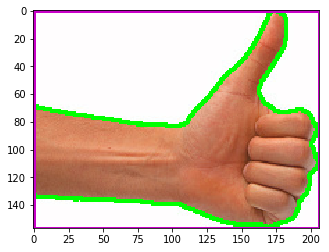

In [49]:
## TODO: Complete this function so that
## it returns a new, cropped version of the original image
def left_hand_crop(image, selected_contour):
    """
    Left hand crop 
    :param image: the original image
    :param selectec_contour: the contour that will be used for cropping
    :return: cropped_image, the cropped image around the left hand
    """
    x,y,w,h = cv2.boundingRect(selected_contour)
    ## TODO: Detect the bounding rectangle of the left hand contour
    box_image = cv2.rectangle(image, (x,y), (x+w,y+h), (200,0,200),2)
    ## TODO: Crop the image using the dimensions of the bounding rectangle
    # Make a copy of the image to crop
    cropped_image = np.copy(image)
    cropped_image = image[y: y + h, x: x + w]
    return cropped_image


## TODO: Select the left hand contour from the list
## Replace this value
selected_contour = contours[1]


# ---------------------------------------------------------- #
# If you've selected a contour
if(selected_contour is not None):
    # Call the crop function with that contour passed in as a parameter
    cropped_image = left_hand_crop(image, selected_contour)
    plt.imshow(cropped_image)

# Congratulations! You have finished your last assignment \o/